In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings("ignore")
from datetime import datetime, time

In [94]:
trades = pd.read_csv("PXA.X 20250115 Stocks Trades.csv")
trades["Date-Time"] = pd.to_datetime(trades["Date-Time"])

In [103]:
lob = pd.read_csv("PXA.X 20250115 Market Depth Legacy x 10.csv")
lob["Date-Time"] = pd.to_datetime(lob["Date-Time"])
print(lob.shape)
lob.columns

(24996, 65)


Index(['#RIC', 'Domain', 'Date-Time', 'Type', 'L1-BidPrice', 'L2-BidPrice',
       'L3-BidPrice', 'L4-BidPrice', 'L5-BidPrice', 'L6-BidPrice',
       'L7-BidPrice', 'L8-BidPrice', 'L9-BidPrice', 'L10-BidPrice',
       'L1-BidSize', 'L2-BidSize', 'L3-BidSize', 'L4-BidSize', 'L5-BidSize',
       'L6-BidSize', 'L7-BidSize', 'L8-BidSize', 'L9-BidSize', 'L10-BidSize',
       'L1-BuyNo', 'L2-BuyNo', 'L3-BuyNo', 'L4-BuyNo', 'L5-BuyNo', 'L6-BuyNo',
       'L7-BuyNo', 'L8-BuyNo', 'L9-BuyNo', 'L10-BuyNo', 'L1-AskPrice',
       'L2-AskPrice', 'L3-AskPrice', 'L4-AskPrice', 'L5-AskPrice',
       'L6-AskPrice', 'L7-AskPrice', 'L8-AskPrice', 'L9-AskPrice',
       'L10-AskPrice', 'L1-AskSize', 'L2-AskSize', 'L3-AskSize', 'L4-AskSize',
       'L5-AskSize', 'L6-AskSize', 'L7-AskSize', 'L8-AskSize', 'L9-AskSize',
       'L10-AskSize', 'L1-SellNo', 'L2-SellNo', 'L3-SellNo', 'L4-SellNo',
       'L5-SellNo', 'L6-SellNo', 'L7-SellNo', 'L8-SellNo', 'L9-SellNo',
       'L10-SellNo', 'Exch Time'],
      dtype='

In [106]:
# Extracting time component only
trades['Date-Time'] = pd.to_datetime(trades['Date-Time'])
trades['Time'] = trades['Date-Time'].dt.time

# Filter trades by time
start_time = time(10, 10, 0)  # 10:10:00 AM
end_time = time(16, 0, 0)     # 16:00:00 PM
filtered_trades = trades[trades['Time'] >= start_time]
filtered_trades = filtered_trades[filtered_trades["Time"] <= end_time]


# Extracting time component only
lob['Date-Time'] = pd.to_datetime(lob['Date-Time'])
lob['Time'] = lob['Date-Time'].dt.time

# Filter trades by time
start_time = time(10, 10, 0)  # 10:10:00 AM
end_time = time(16, 0, 0)     # 16:00:00 PM
lob = lob[lob['Time'] >= start_time]
lob = lob[lob["Time"] <= end_time]
lob = lob.reset_index()
lob["LOB_Index"] = lob.index

In [107]:
levels = range(1, 11)  # 1 to 10

# Calculate bid-ask spread at each level
for level in levels:
    bid_col = f"L{level}-BidPrice"
    ask_col = f"L{level}-AskPrice"
    spread_col = f"L{level}-Spread"

    bidsize_col = f"L{level}-BidSize"
    asksize_col = f"L{level}-AskSize"

    midprice1_col = f"L{level}-MidPrice_Simple"
    midprice2_col = f"L{level}-MidPrice_VW"
    midprice3_col = f"L{level}-MidPrice_SCVW"

    cum_bid_col = f"L{level}-CumBidDepth"
    cum_ask_col = f"L{level}-CumAskDepth"
    depth_imb_col = f"L{level}-DepthImbalance"
    min_depth_col = f"L{level}-MinDepth"

    # Ensure columns exist in the dataset before calculating
    if bid_col in lob.columns and ask_col in lob.columns:
        lob[spread_col] = lob[ask_col] - lob[bid_col]
        lob[midprice1_col] = (lob[bid_col] + lob[ask_col]) / 2
        lob[midprice2_col] = ( (lob[bid_col] * lob[bidsize_col])  + (lob[ask_col] * lob[asksize_col]) ) / (lob[bidsize_col] + lob[asksize_col])
        lob[midprice3_col] = ( (lob[bid_col] * lob[asksize_col])  + (lob[ask_col] * lob[bidsize_col]) ) / (lob[bidsize_col] + lob[asksize_col])

        # Cumulative order depth
        lob[cum_bid_col] = lob[bidsize_col] if level == 1 else lob[cum_bid_col.replace(f"L{level}", f"L{level-1}")] + lob[bidsize_col]
        lob[cum_ask_col] = lob[asksize_col] if level == 1 else lob[cum_ask_col.replace(f"L{level}", f"L{level-1}")] + lob[asksize_col]

        # Order depth imbalance
        lob[depth_imb_col] = (lob[cum_bid_col] - lob[cum_ask_col])

        # Minimum available depth
        lob[min_depth_col] = lob[[bidsize_col, asksize_col]].min(axis=1)

In [108]:
l1cols = ["L1-BidPrice", "L1-BuyNo", "L1-BidSize", "L1-AskPrice", "L1-AskSize", "L1-SellNo", "L1-Spread", "L1-MidPrice_Simple", "L1-MidPrice_VW", "L1-MidPrice_SCVW", "L1-CumBidDepth", "L1-CumAskDepth", "L1-DepthImbalance", "L1-MinDepth", "LOB_Index", "Time"]
lob[l1cols]

,L1-BidPrice,L1-BuyNo,L1-BidSize,L1-AskPrice,L1-AskSize,L1-SellNo,L1-Spread,L1-MidPrice_Simple,L1-MidPrice_VW,L1-MidPrice_SCVW,L1-CumBidDepth,L1-CumAskDepth,L1-DepthImbalance,L1-MinDepth,LOB_Index,Time
0,12.86,9.0,1204.0,12.90,64.0,2.0,0.04,12.880,12.862019,12.897981,1204.0,64.0,1140.0,64.0,0,10:10:40.160356
1,12.86,9.0,1204.0,12.90,64.0,2.0,0.04,12.880,12.862019,12.897981,1204.0,64.0,1140.0,64.0,1,10:10:58.235665
2,12.86,9.0,1204.0,12.90,64.0,2.0,0.04,12.880,12.862019,12.897981,1204.0,64.0,1140.0,64.0,2,10:11:13.120360
3,12.86,9.0,1204.0,12.91,208.0,3.0,0.05,12.885,12.867365,12.902635,1204.0,208.0,996.0,208.0,3,10:11:15.790351
4,12.86,9.0,1204.0,12.91,208.0,3.0,0.05,12.885,12.867365,12.902635,1204.0,208.0,996.0,208.0,4,10:11:15.790555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23762,13.00,1.0,136.0,13.04,221.0,1.0,0.04,13.020,13.024762,13.015238,136.0,221.0,-85.0,136.0,23762,15:59:45.279642
23763,13.00,1.0,136.0,13.03,218.0,1.0,0.03,13.015,13.018475,13.011525,136.0,218.0,-82.0,136.0,23763,15:59:45.279642
23764,13.00,2.0,156.0,13.03,218.0,1.0,0.03,13.015,13.017487,13.012513,156.0,218.0,-62.0,156.0,23764,15:59:45.279642
23765,13.00,2.0,156.0,13.03,218.0,1.0,0.03,13.015,13.017487,13.012513,156.0,218.0,-62.0,156.0,23765,15:59:45.293909


In [99]:
l10cols = ["L10-BidPrice", "L10-BuyNo", "L10-BidSize", "L10-AskPrice", "L10-AskSize", "L10-SellNo", "L10-Spread", "L10-MidPrice_Simple", "L10-MidPrice_VW", "L10-MidPrice_SCVW", "L10-CumBidDepth", "L10-CumAskDepth", "L10-DepthImbalance", "L10-MinDepth", "LOB_Index", "Time"]
lob[l10cols]

,L10-BidPrice,L10-BuyNo,L10-BidSize,L10-AskPrice,L10-AskSize,L10-SellNo,L10-Spread,L10-MidPrice_Simple,L10-MidPrice_VW,L10-MidPrice_SCVW,L10-CumBidDepth,L10-CumAskDepth,L10-DepthImbalance,L10-MinDepth,LOB_Index,Time
740,12.77,4.0,140.0,12.99,451.0,3.0,0.22,12.880,12.937885,12.822115,4177.0,7598.0,-3421.0,140.0,740,10:10:40.160356
741,12.77,4.0,140.0,12.99,451.0,3.0,0.22,12.880,12.937885,12.822115,4274.0,7598.0,-3324.0,140.0,741,10:10:58.235665
742,12.77,4.0,140.0,12.99,451.0,3.0,0.22,12.880,12.937885,12.822115,4502.0,7598.0,-3096.0,140.0,742,10:11:13.120360
743,12.77,4.0,140.0,13.00,2465.0,4.0,0.23,12.885,12.987639,12.782361,4502.0,9999.0,-5497.0,140.0,743,10:11:15.790351
744,12.77,4.0,140.0,13.00,2465.0,4.0,0.23,12.885,12.987639,12.782361,4737.0,9999.0,-5262.0,140.0,744,10:11:15.790555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24960,12.91,1.0,233.0,13.13,234.0,1.0,0.22,13.020,13.020236,13.019764,2276.0,2674.0,-398.0,233.0,24960,15:59:45.279642
24961,12.91,1.0,233.0,13.12,225.0,1.0,0.21,13.015,13.013166,13.016834,2276.0,2658.0,-382.0,225.0,24961,15:59:45.279642
24962,12.91,1.0,233.0,13.12,225.0,1.0,0.21,13.015,13.013166,13.016834,2296.0,2658.0,-362.0,225.0,24962,15:59:45.279642
24963,12.91,1.0,233.0,13.12,225.0,1.0,0.21,13.015,13.013166,13.016834,2296.0,2658.0,-362.0,225.0,24963,15:59:45.293909


In [109]:
# ✅ Find the most recent LOB entry before each trade using searchsorted
lob = lob.sort_values(by="Time")
filtered_trades = filtered_trades.sort_values(by="Time")

lob_timestamps = lob["Time"].values
trade_timestamps = filtered_trades["Time"].values

# Find the index of the most recent LOB entry before the trade
indices = lob_timestamps.searchsorted(trade_timestamps, side="right") - 1

# Assign corresponding LOB index to trades
filtered_trades["LOB_Index"] = indices

filtered_trades.head(2)

,#RIC,Alias Underlying RIC,Domain,Date-Time,Type,Price,Volume,Market VWAP,Buyer ID,Bid Price,...,Qualifiers,Exch Time,Date,Tick Dir.,Open,High,Low,Turnover,Time,LOB_Index
50,PXA.AX,NaN,Market Price,2025-01-15 10:11:15.760473307+11:00,Trade,12.9,14.0,12.73996,NaN,12.86,...,B[ACT_FLAG1];[GV4_TEXT];[LSTSALCOND],23:11:15.637000000,2025-01-14,^,12.74,12.9,12.7,12714.48,10:11:15.760473,6
51,PXA.CHA,NaN,Market Price,2025-01-15 10:11:21.484570847+11:00,Trade,12.9,23.0,12.90000,NaN,12.87,...,[GV4_TEXT];Y [ELIGBL_TRD];[TRD_IND_1];[LSTSAL...,23:11:21.360125000,2025-01-14,^,12.90,12.9,12.9,297.00,10:11:21.484570,46


In [112]:
merged_to = pd.merge(filtered_trades, lob, on="LOB_Index")
print(merged_to.shape)
cols = ["Time_x", "Price", "Volume", "L1-BidPrice", "L1-AskPrice", "Time_y"]
merged_to[cols].head(10)

(4406, 172)


,Time_x,Price,Volume,L1-BidPrice,L1-AskPrice,Time_y
0,10:11:15.760473,12.90,14.0,12.87,12.91,10:11:15.790555
1,10:11:21.484570,12.90,23.0,12.89,12.91,10:11:21.515411
2,10:11:21.484570,12.90,24.0,12.89,12.91,10:11:21.515411
3,10:11:21.484570,12.90,10.0,12.89,12.91,10:11:21.515411
4,10:11:21.485555,12.91,50.0,12.89,12.91,10:11:21.515411
5,10:11:21.485555,12.91,120.0,12.89,12.91,10:11:21.515411
6,10:11:21.485555,12.91,38.0,12.89,12.91,10:11:21.515411
7,10:11:21.485555,12.91,18.0,12.89,12.91,10:11:21.515411
8,10:11:21.485555,12.91,5.0,12.89,12.91,10:11:21.515411
9,10:11:21.490417,12.91,2.0,12.89,12.92,10:11:21.520414


In [116]:
merged_to[["Price", "Time_x", "Market VWAP", "L1-BidPrice", "L1-AskPrice", "Time_y"]]

,Price,Time_x,Market VWAP,L1-BidPrice,L1-AskPrice,Time_y
0,12.900,10:11:15.760473,12.739960,12.87,12.91,10:11:15.790555
1,12.900,10:11:21.484570,12.900000,12.89,12.91,10:11:21.515411
2,12.900,10:11:21.484570,12.900000,12.89,12.91,10:11:21.515411
3,12.900,10:11:21.484570,12.900000,12.89,12.91,10:11:21.515411
4,12.910,10:11:21.485555,12.748073,12.89,12.91,10:11:21.515411
...,...,...,...,...,...,...
4401,13.015,15:59:53.015519,12.997543,13.01,13.04,15:59:45.279642
4402,13.015,15:59:54.575771,12.997543,13.00,13.04,15:59:45.279642
4403,13.015,15:59:54.575771,12.997544,13.00,13.04,15:59:45.279642
4404,13.015,15:59:56.041263,12.997544,13.00,13.04,15:59:45.279642


In [117]:
merged_to.to_csv("PXA_filtered_merged.csv", index=False)

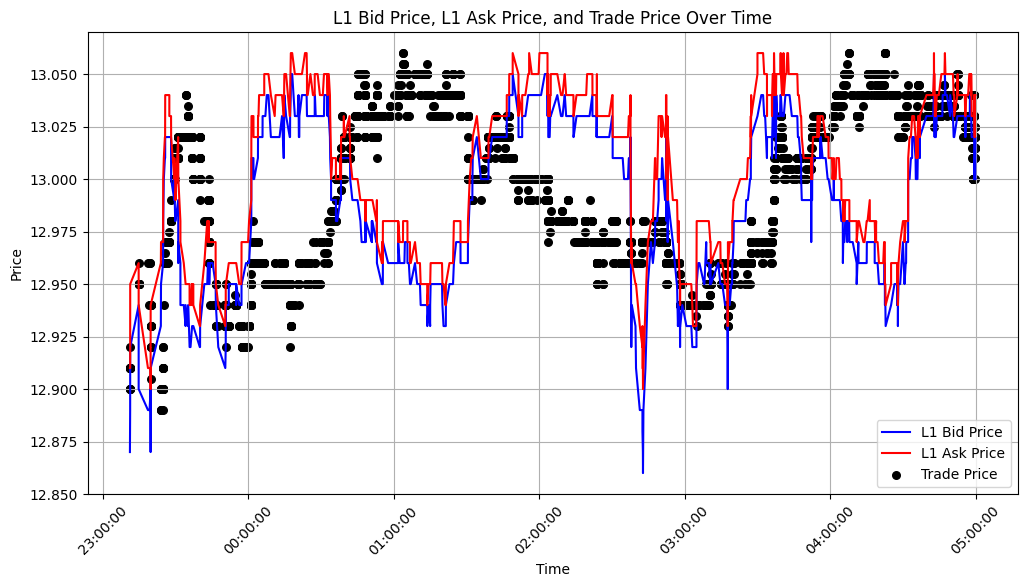

In [118]:
import matplotlib.dates as mdates
plt.figure(figsize=(12,6))

# Plot L1 Bid and Ask Prices (Order Book)
plt.plot(merged_to["Date-Time_x"], merged_to["L1-BidPrice"], label="L1 Bid Price", color="blue", linestyle="-")
plt.plot(merged_to["Date-Time_x"], merged_to["L1-AskPrice"], label="L1 Ask Price", color="red", linestyle="-")

# Overlay Trade Prices as Scatter Points
plt.scatter(merged_to["Date-Time_x"], merged_to["Price"], label="Trade Price", color="black", marker="o", s=30)

# Format the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))  # Show HH:MM:SS
plt.xticks(rotation=45)

# Add Labels and Title
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("L1 Bid Price, L1 Ask Price, and Trade Price Over Time")
plt.legend()
plt.grid(True)

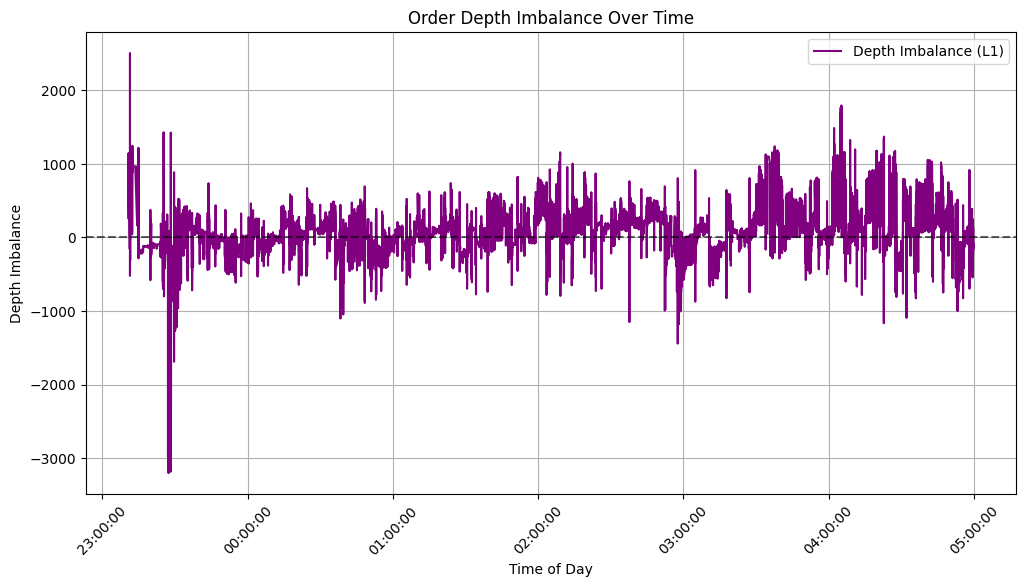

In [119]:
# Select which depth imbalance level to plot (e.g., L1, L5, or aggregate)
depth_col = "L1-DepthImbalance"  # Change this to analyze different levels

# Ensure the DataFrame is sorted by time
lob = lob.sort_values("Date-Time")

# Create the plot
plt.figure(figsize=(12,6))
plt.plot(lob["Date-Time"], lob[depth_col], label="Depth Imbalance (L1)", color="purple", linestyle="-")

# Format x-axis for better readability
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))  # Show HH:MM:SS
plt.xticks(rotation=45)

# Add Labels and Title
plt.xlabel("Time of Day")
plt.ylabel("Depth Imbalance")
plt.title("Order Depth Imbalance Over Time")
plt.axhline(0, color='black', linestyle='--', alpha=0.6)  # Reference line at 0
plt.legend()
plt.grid(True)

In [120]:
merged_to[["Price", "L1-MidPrice_Simple", "L1-MidPrice_VW", "L1-MidPrice_SCVW", "Time_x", "Time_y"]]

,Price,L1-MidPrice_Simple,L1-MidPrice_VW,L1-MidPrice_SCVW,Time_x,Time_y
0,12.900,12.890,12.902248,12.877752,10:11:15.760473,10:11:15.790555
1,12.900,12.900,12.890388,12.909612,10:11:21.484570,10:11:21.515411
2,12.900,12.900,12.890388,12.909612,10:11:21.484570,10:11:21.515411
3,12.900,12.900,12.890388,12.909612,10:11:21.484570,10:11:21.515411
4,12.910,12.900,12.890388,12.909612,10:11:21.485555,10:11:21.515411
...,...,...,...,...,...,...
4401,13.015,13.025,13.039467,13.010533,15:59:53.015519,15:59:45.279642
4402,13.015,13.020,13.024762,13.015238,15:59:54.575771,15:59:45.279642
4403,13.015,13.020,13.024762,13.015238,15:59:54.575771,15:59:45.279642
4404,13.015,13.020,13.024762,13.015238,15:59:56.041263,15:59:45.279642


In [121]:
# List of all mid-price columns to compare with traded price
midprice_columns = [f"L{level}-MidPrice_Simple" for level in range(1, 11)] + \
                   [f"L{level}-MidPrice_VW" for level in range(1, 11)] + \
                   [f"L{level}-MidPrice_SCVW" for level in range(1, 11)]

# Create an empty List to store results
metrics_list = []

# Compute statistics for each mid-price type at each level
for col in midprice_columns:
    if col in merged_to.columns:
        trade_prices = merged_to["Price"]  # Actual traded prices
        mid_prices = merged_to[col]  # Mid-price at given level

        # Compute error metrics
        diff = trade_prices - mid_prices
        mae = np.mean(np.abs(diff))
        mse = np.mean(diff ** 2)
        rmse = np.sqrt(mse)
        mean_diff = np.mean(diff)
        tracking_error = np.std(diff)
        correlation = np.corrcoef(trade_prices, mid_prices)[0, 1] if len(trade_prices) > 1 else np.nan
        te_check = np.sqrt(mse - mean_diff ** 2)

        # Store results in DataFrame
        metrics_list.append({
            "Level": col.split("-")[0],  # Extract L1, L2, etc.
            "Type": col.split("-")[-1],  # Extract Simple, VW, SCVW
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "Mean Difference": mean_diff,
            "Tracking Error": tracking_error,
            "Correlation": correlation,
            "TE Check": te_check
        })

metrics_df = pd.DataFrame(metrics_list)

In [122]:
metrics_df

,Level,Type,MAE,MSE,RMSE,Mean Difference,Tracking Error,Correlation,TE Check
0,L1,MidPrice_Simple,0.043303,0.002773,0.052663,-0.000339,0.052662,0.014301,0.052662
1,L2,MidPrice_Simple,0.043322,0.002775,0.052675,-0.000346,0.052674,0.014248,0.052674
2,L3,MidPrice_Simple,0.043340,0.002776,0.052691,-0.000364,0.052690,0.013922,0.052690
3,L4,MidPrice_Simple,0.043345,0.002777,0.052698,-0.000381,0.052697,0.013636,0.052697
4,L5,MidPrice_Simple,0.043412,0.002783,0.052750,-0.000457,0.052748,0.012207,0.052748
5,L6,MidPrice_Simple,0.043423,0.002783,0.052755,-0.000470,0.052753,0.012007,0.052753
6,L7,MidPrice_Simple,0.043421,0.002783,0.052759,-0.000475,0.052756,0.011889,0.052756
7,L8,MidPrice_Simple,0.043386,0.002781,0.052731,-0.000513,0.052728,0.011119,0.052728
8,L9,MidPrice_Simple,0.043414,0.002786,0.052784,-0.000384,0.052782,NaN,0.052782
9,L10,MidPrice_Simple,0.043489,0.002794,0.052857,-0.000344,0.052856,NaN,0.052856
